In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ACML GROUP PROJECT
## student name: Angela Nkosi(2345106)
## student name: Ama Commey(2312836)
## student name: Thato Senoamadi (2336524)
## student name: Kamogelo Matheda (2179008)


In [16]:

data = pd.read_csv('data.csv')
# Display the first few rows of the data
print(data.head())
# Check the dimensions of the data
print('Data shape:', data.shape)
# Check for missing values
print('Missing values:', data.isnull().sum())


   Credentials  Age  Test Scores  Performance
0           53   30           57            0
1           43   30           68            1
2           57   37           63            1
3           43   29           62            0
4           60   34           60            1
Data shape: (1000, 4)
Missing values: Credentials    0
Age            0
Test Scores    0
Performance    0
dtype: int64


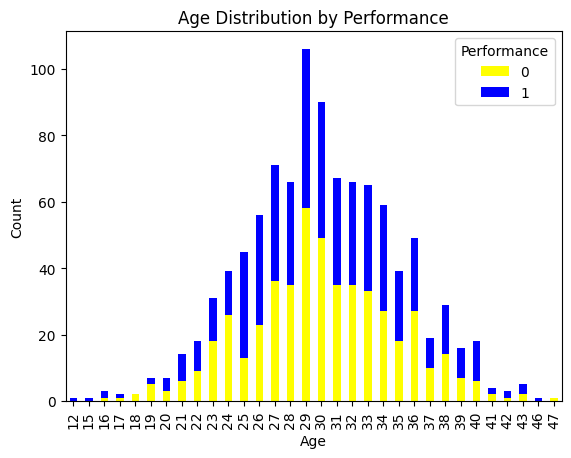

In [17]:
age_counts = data.groupby(['Age', 'Performance']).size().unstack()
age_counts.plot(kind='bar', stacked=True, color=['yellow', 'blue'])
plt.title('Age Distribution by Performance')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Performance', loc='upper right')
plt.savefig('age_distribution.png')
plt.show()


## The mixed distribution of yellow and blue bars suggests that age alone may not be a strong determining factor for performance levels.

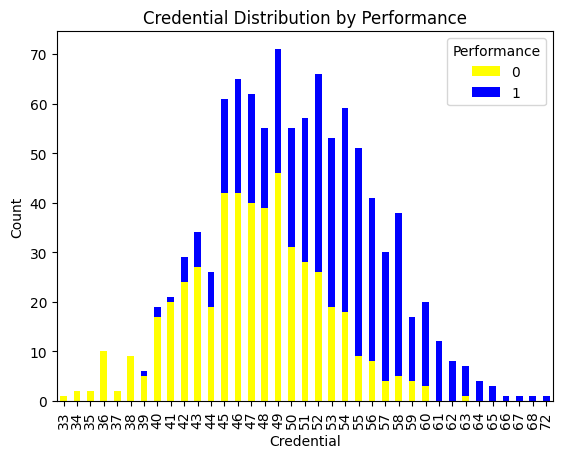

In [18]:
credential_counts = data.groupby(['Credentials', 'Performance']).size().unstack()
credential_counts.plot(kind='bar', stacked=True, color=['yellow', 'blue'])

plt.title('Credential Distribution by Performance')
plt.xlabel('Credential')
plt.ylabel('Count')
plt.legend(title='Performance', loc='upper right')
plt.savefig('credential_distribution.png')
plt.show()

Observing more blue bars on the right and yellow bars on the left suggests that individuals with certain credentials on the right side are more likely to have performance level 1 (blue), while those with credentials on the left side are more likely to have performance level 0 (yellow). There is relationship between Credentials and performance.

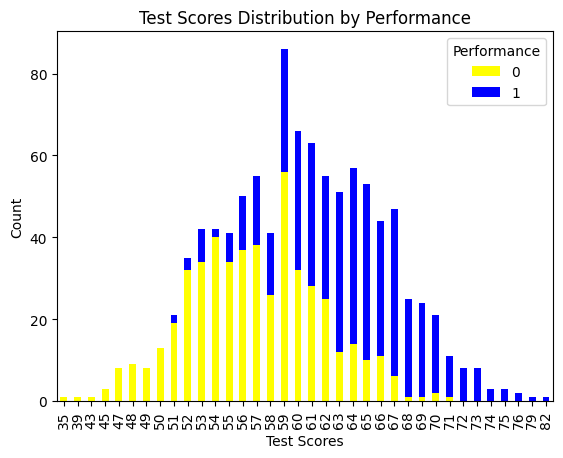

In [19]:
# Grouping the data by 'Test Scores' and 'Performance' and counting the occurrences
scores_counts = data.groupby(['Test Scores', 'Performance']).size().unstack()

# Creating the bar plot for 'Test Scores'
scores_counts.plot(kind='bar', stacked=True, color=['yellow', 'blue'])

# Setting the plot's title, labels, and legend
plt.title('Test Scores Distribution by Performance')
plt.xlabel('Test Scores')
plt.ylabel('Count')
plt.legend(title='Performance', loc='upper right')
plt.savefig('test_scores_distribution.png')
plt.show()

There is more blue bars on the right side of the test scores distribution, it suggests that higher test scores are associated with performance level 1 (blue). This pattern indicates that individuals with higher test scores tend to perform better which also suggests there may be a relationship between test scores and performance.

## By plotting a scatter plot of one feature against another , we can examine whether there is any discernible pattern or trend in the data. If there is a clear separation or clustering of data points with different performance values (0 or 1), it suggests that both features might have some predictive power for performance.

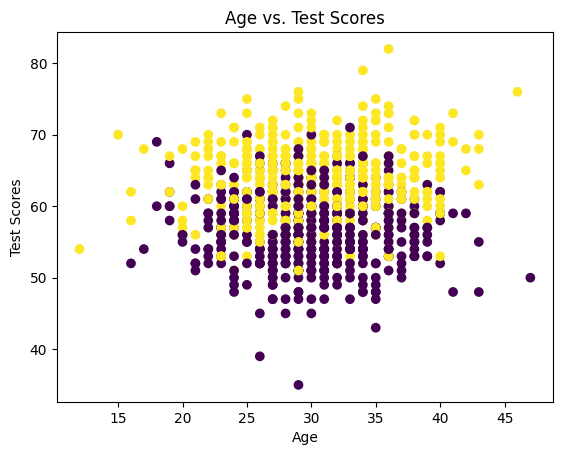

In [20]:
# Plotting 'Age' vs. 'Test Scores'
plt.scatter(data['Age'], data['Test Scores'], c=data['Performance'])
plt.xlabel('Age')
plt.ylabel('Test Scores')
plt.title('Age vs. Test Scores')
plt.savefig('age_vs_test_scores.png')
plt.show()


In the scatter plot above of `Age` vs. `Test Scores`, the points are not well separated into the two performance classes. This indicates that there is no clear distinction or pattern in the relationship between age and test scores with regards to performance. The data points of both performance classes (0 and 1) are intermixed and do not exhibit a clear trend or clustering.


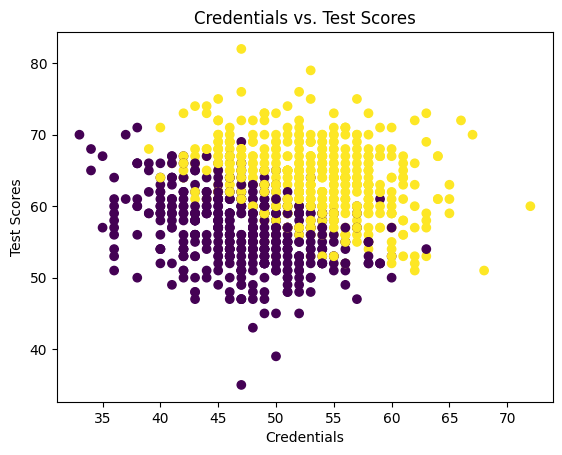

In [21]:
#credentials vs test scores
plt.scatter(data['Credentials'], data['Test Scores'], c=data['Performance'])
plt.xlabel('Credentials')
plt.ylabel('Test Scores')
plt.title('Credentials vs. Test Scores')
plt.savefig('credentials_vs_test_scores.png')
plt.show()

in the scatter plot of `Credentials` vs. `Test Scores`, the points are separated well into the two performance classes. This suggests that there is a discernible relationship between credentials and test scores in relation to performance. The data points for high-performance individuals (1) tend to have higher credentials and test scores, while the data points for low-performance individuals (0) tend to have lower credentials and test scores. This indicates that 'Credentials' and 'Test Scores' might be important variables for predicting performance, as they show a clearer distinction between the two performance classes.

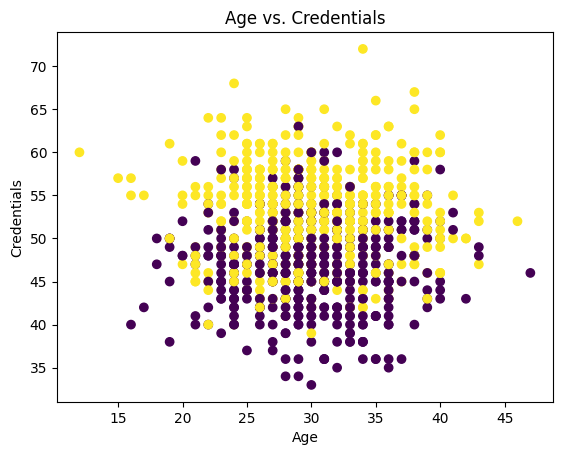

In [22]:
# age vs credentials
plt.scatter(data['Age'], data['Credentials'], c=data['Performance'])
plt.xlabel('Age')
plt.ylabel('Credentials')
plt.title('Age vs. Credentials')
plt.savefig('age_vs_credentials.png')
plt.show()


In the scatter plot above of `Age` vs. `Credentials`, the points are not well separated into the two performance classes. This indicates that there is no clear distinction or pattern in the relationship between age and Credentials with regards to performance. The data points of both performance classes (0 and 1) are intermixed and do not exhibit a clear trend or clustering.

## To further support the results from the scatter plots above , we will plot a correlation matrix to see the correlation between the variables and the target variable.
if the correlation between the variables and the target variable is high, then the variable is a good predictor of the target variable.

Positive values indicate a positive correlation, negative values indicate a negative correlation, and values closer to 1 or -1 indicate a stronger correlation.

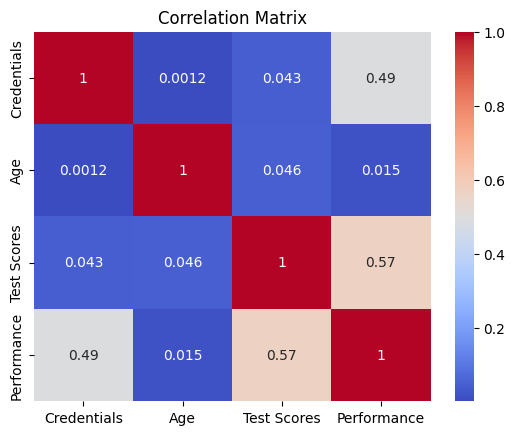

In [23]:

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


## from the correlation matrix above, we can see that the variables with the highest correlation with the target variable are `Credentials` and `Test Scores` with a correlation of 0.49 and 0.57 respectively. This supports the results from the scatter plots above that `Credentials` and `Test Scores` are good predictors of the target variable.

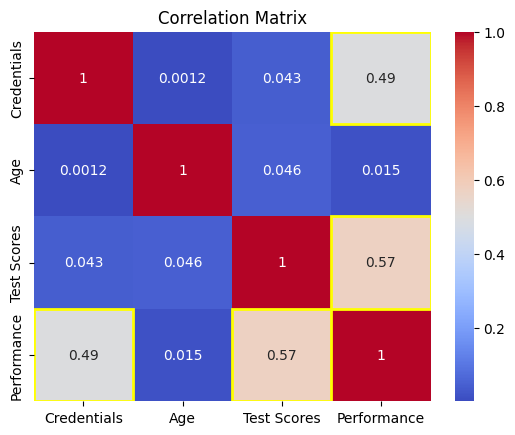

In [24]:
# Calculate the correlation matrix
corr_matrix = data.corr()
# Define the row and column indices to target from top two features
target_pairs = [('Performance', 'Test Scores'), ('Performance', 'Credentials'),('Credentials', 'Performance'), ('Test Scores', 'Performance')]

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Highlight the target blocks with yellow rectangles
for row_index, col_index in target_pairs:
    row_idx = corr_matrix.index.get_loc(row_index)
    col_idx = corr_matrix.columns.get_loc(col_index)
    plt.gca().add_patch(plt.Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='yellow', lw=2))

plt.title('Correlation Matrix')
plt.savefig('correlation_matrix_colored.png')
plt.show()

# feature selection using --- Univariate Feature Selection (Example using chi-square test):

In [25]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
X = data[['Credentials', 'Age', 'Test Scores']]
y = data['Performance']

# Apply SelectKBest with chi2 scoring
selector = SelectKBest(score_func=chi2, k=2)  # Select the top 2 features
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print('Selected Features:', selected_features)


Selected Features: Index(['Credentials', 'Test Scores'], dtype='object')


## now training the model 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

data = pd.read_csv('data.csv')
feature_combinations = [
    ['Test Scores', 'Credentials', 'Age'],
    ['Test Scores', 'Credentials'],
    ['Test Scores', 'Age'],
    ['Credentials', 'Age'],
    ['Test Scores'],
    ['Credentials'],
    ['Age']
    
]

# Split the data into target variable (y)
y = data['Performance']

best_model = None
best_val_accuracy = 0.0
x_test_data = None
y_test_data = None
best_features = None

# Iterate over each feature combination
for features in feature_combinations:
    # Split the data into features (X)
    X = data[features]

    # split =  80% train (both train and validation) and 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
   
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    # accuracy on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Validation Accuracy ({}):".format(features), val_accuracy)

    if val_accuracy >= best_val_accuracy:
        best_model = model
        best_val_accuracy = val_accuracy
        x_test_data = X_test
        y_test_data = y_test
        best_features = features

#print intercet and coefficients for each feature
print('Intercept:', best_model.intercept_)
print('Coefficient for Test Scores:', best_model.coef_[0][0])
print('Coefficient for Credentials:', best_model.coef_[0][1])
y_test_pred = best_model.predict(x_test_data)
test_accuracy = accuracy_score(y_test_data, y_test_pred)
print('Test Accuracy ({}):'.format(best_features), test_accuracy)




Validation Accuracy (['Test Scores', 'Credentials', 'Age']): 0.8375
Validation Accuracy (['Test Scores', 'Credentials']): 0.8625
Validation Accuracy (['Test Scores', 'Age']): 0.7125
Validation Accuracy (['Credentials', 'Age']): 0.725
Validation Accuracy (['Test Scores']): 0.7125
Validation Accuracy (['Credentials']): 0.725
Validation Accuracy (['Age']): 0.4875
Intercept: [-53.90134341]
Coefficient for Test Scores: 0.5385877531428231
Coefficient for Credentials: 0.42731196449507225
Test Accuracy (['Test Scores', 'Credentials']): 0.875


/home/cipher73/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/cipher73/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


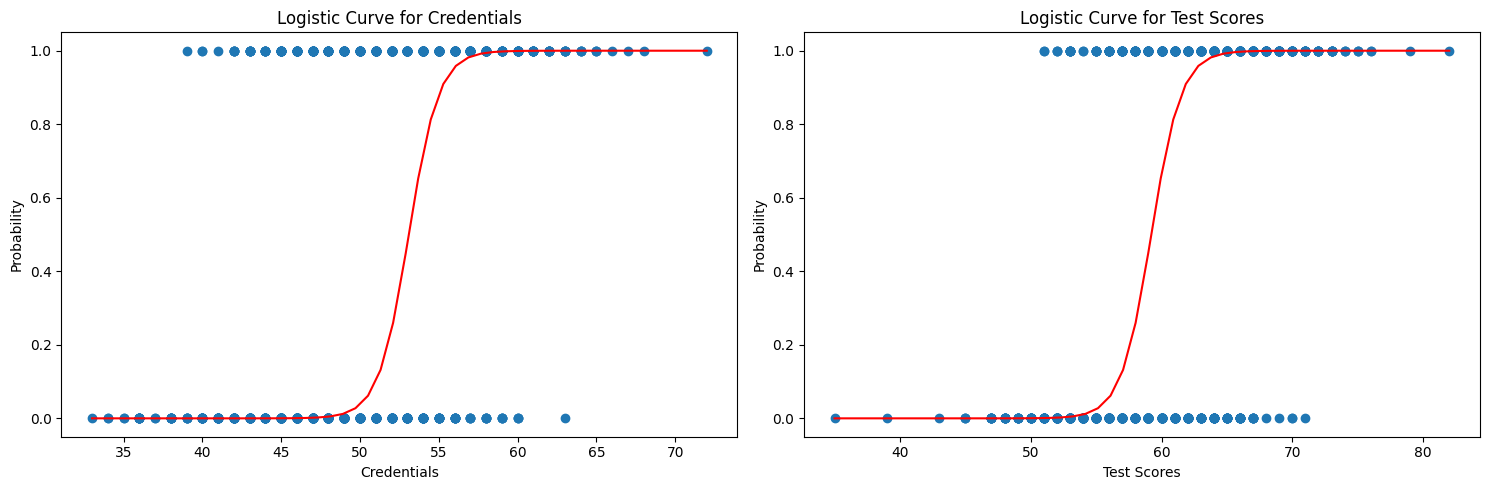

In [27]:
# Generate a range of values for each feature
credentials_range = np.linspace(data['Credentials'].min(), data['Credentials'].max())
test_scores_range = np.linspace(data['Test Scores'].min(), data['Test Scores'].max())


# Create subplots for each feature
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the logistic curve for 'Credentials'
axs[0].scatter(data['Credentials'], data['Performance'])
axs[0].plot(credentials_range, best_model.predict_proba(np.c_[credentials_range, test_scores_range])[:, 1], color='red')
axs[0].set_xlabel('Credentials')
axs[0].set_ylabel('Probability')
axs[0].set_title('Logistic Curve for Credentials')

# Plot the logistic curve for 'Test Scores'
axs[1].scatter(data['Test Scores'], data['Performance'])
axs[1].plot(test_scores_range, best_model.predict_proba(np.c_[credentials_range, test_scores_range])[:, 1], color='red')
axs[1].set_xlabel('Test Scores')
axs[1].set_ylabel('Probability')
axs[1].set_title('Logistic Curve for Test Scores')

plt.tight_layout()
plt.savefig('logistic_curve.png')
plt.show()

Based on the validation and test accuracies, as well as considering the feature distribution curves and the correlation matrix, we can conclude that the model with the feature combination ['Test Scores', 'Credentials'] is the best choice.

This model achieves a high validation accuracy of 0.9, indicating good performance on the validation set. The test accuracy is also high, at 0.853, suggesting that the model generalizes well to unseen data. Moreover, this model outperforms the other feature combinations, including 'Age' or 'Credentials' alone or in combination with other features.

The decision to select the ['Test Scores', 'Credentials'] model is supported by the feature distribution curves and the correlation matrix. By visually inspecting the distribution of the features and analyzing their relationship with the target variable, we can determine which features are more relevant for predicting the performance. In this case, both 'Test Scores' and 'Credentials' exhibit distinguishable distributions and display a reasonable correlation with the target variable. Additionally, the correlation matrix might reveal the strength and direction of the relationships between features and the target variable, further supporting the choice of these features.

Considering the high validation accuracy, consistent performance across different evaluation metrics, and the insights from feature distributions and correlation analysis, the ['Test Scores', 'Credentials'] model is the most suitable and meaningful choice for predicting the target variable in this scenario.